In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression, GenericUnivariateSelect, SelectFromModel
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV

In [ ]:
clv_data = pd.read_csv("clean_clv.csv")

In [ ]:

clv_data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


spliting the data to test and train 30% and 70%

In [ ]:
X = clv_data.drop(columns=["Customer Lifetime Value"])
y = clv_data["Customer Lifetime Value"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6393, 21), (2741, 21), (6393,), (2741,))

In [ ]:
clv_data["Coverage"].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [ ]:
clv_data["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

Encoding categorical data, One-hot encode nominal data, Ordinal encoder ordinal data (data with a certain rank),Standardize numeric data

In [ ]:
transformer = ColumnTransformer(transformers=[
  ("oe_coverage", OrdinalEncoder(categories=[["Basic",
                                              "Extended",
                                              "Premium"]]), ["Coverage"]),

  ("oe_education", OrdinalEncoder(categories=[["High School or Below",
                                               "College",
                                               "Bachelor",
                                               "Master",
                                               "Doctor"]]), ["Education"]),

  ("one_hot_enc", OneHotEncoder(sparse_output=False, handle_unknown = 'ignore', drop="first"),
       ["State",
        "Response",
        "EmploymentStatus",
        "Gender",
        "Location Code",
        "Marital Status",
        "Policy Type",
        "Policy",
        "Renew Offer Type",
        "Sales Channel",
        "Vehicle Class",
        "Vehicle Size"])],
  remainder=StandardScaler()
)

transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('oe_coverage',
                                 OrdinalEncoder(categories=[['Basic',
                                                             'Extended',
                                                             'Premium']]),
                                 ['Coverage']),
                                ('oe_education',
                                 OrdinalEncoder(categories=[['High School or '
                                                             'Below',
                                                             'College',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctor']]),
                                 ['Education']),
                                ('one_hot_enc',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['State', 'Response', 'EmploymentStatus',
                                  'Gender', 'Location Code', 'Marital Status',
                                  'Policy Type', 'Policy', 'Renew Offer Type',
                                  'Sales Channel', 'Vehicle Class',
                                  'Vehicle Size'])])

In [ ]:
transformed_X_train = pd.DataFrame(transformer.fit_transform(X_train),
                                   columns=transformer.get_feature_names_out(),
                                   index=X_train.index)

In [ ]:

transformed_X_train.head(5)

,oe_coverage__Coverage,oe_education__Education,one_hot_enc__State_California,one_hot_enc__State_Nevada,one_hot_enc__State_Oregon,one_hot_enc__State_Washington,one_hot_enc__Response_Yes,one_hot_enc__EmploymentStatus_Employed,one_hot_enc__EmploymentStatus_Medical Leave,one_hot_enc__EmploymentStatus_Retired,...,one_hot_enc__Vehicle Class_Two-Door Car,one_hot_enc__Vehicle Size_Medsize,one_hot_enc__Vehicle Size_Small,remainder__Income,remainder__Monthly Premium Auto,remainder__Months Since Last Claim,remainder__Months Since Policy Inception,remainder__Number of Open Complaints,remainder__Number of Policies,remainder__Total Claim Amount
4197,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.242577,-0.594670,-1.397247,-0.610096,-0.42173,0.007895,0.328963
306,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.242577,0.685001,-1.496691,-0.110189,-0.42173,-0.409242,1.388585
6895,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.678404,-0.445871,-0.601691,0.532548,-0.42173,-0.826379,0.075367
7503,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,-0.091963,-0.594670,-0.701136,1.496655,-0.42173,-0.826379,0.142911
7181,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,-1.242577,-0.029234,-0.203913,-1.110003,-0.42173,-0.826379,0.037155


In [ ]:
transformed_X_train.columns

Index(['oe_coverage__Coverage', 'oe_education__Education',
       'one_hot_enc__State_California', 'one_hot_enc__State_Nevada',
       'one_hot_enc__State_Oregon', 'one_hot_enc__State_Washington',
       'one_hot_enc__Response_Yes', 'one_hot_enc__EmploymentStatus_Employed',
       'one_hot_enc__EmploymentStatus_Medical Leave',
       'one_hot_enc__EmploymentStatus_Retired',
       'one_hot_enc__EmploymentStatus_Unemployed', 'one_hot_enc__Gender_M',
       'one_hot_enc__Gender_O', 'one_hot_enc__Location Code_Suburban',
       'one_hot_enc__Location Code_Urban',
       'one_hot_enc__Marital Status_Married',
       'one_hot_enc__Marital Status_Single',
       'one_hot_enc__Policy Type_Personal Auto',
       'one_hot_enc__Policy Type_Special Auto',
       'one_hot_enc__Policy_Corporate L2', 'one_hot_enc__Policy_Corporate L3',
       'one_hot_enc__Policy_Personal L1', 'one_hot_enc__Policy_Personal L2',
       'one_hot_enc__Policy_Personal L3', 'one_hot_enc__Policy_Special L1',
       'one_h

In [ ]:
model = LinearRegression()

pipeline = Pipeline(steps=[("transformer", transformer), ("model", model)])

pipeline.fit(X_train, y_train)
print("Training Score: ", pipeline.score(X_train, y_train))

y_pred = pipeline.predict(X_test)

print("Testing Score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred))

Training Score:  0.1733134227682256
Testing Score:  0.15187282712178496
MAE:  3984.257253684655
RMSE:  41608735.311611846


Getting train and test score without any feature selection. Rsquare is low (very poor performance with linear regression)

In [ ]:

predict_vs_actual = pd.DataFrame({"Predicted": pipeline.predict(X_test), "Actual": y_test})

predict_vs_actual.head(10)

,Predicted,Actual
5260,11980.643096,9259.715798
3995,7291.106439,3808.122147
7495,10179.469338,4633.550875
5610,7981.940306,3549.016697
2061,6671.092293,5689.644114
6844,5661.406936,5502.726803
7062,7549.763636,3694.148760
3975,6197.679850,4995.211519
5228,4778.524630,2242.226055
1104,4637.419190,4880.946440


Ploting predicted vs actual and limiting to just 50 entries

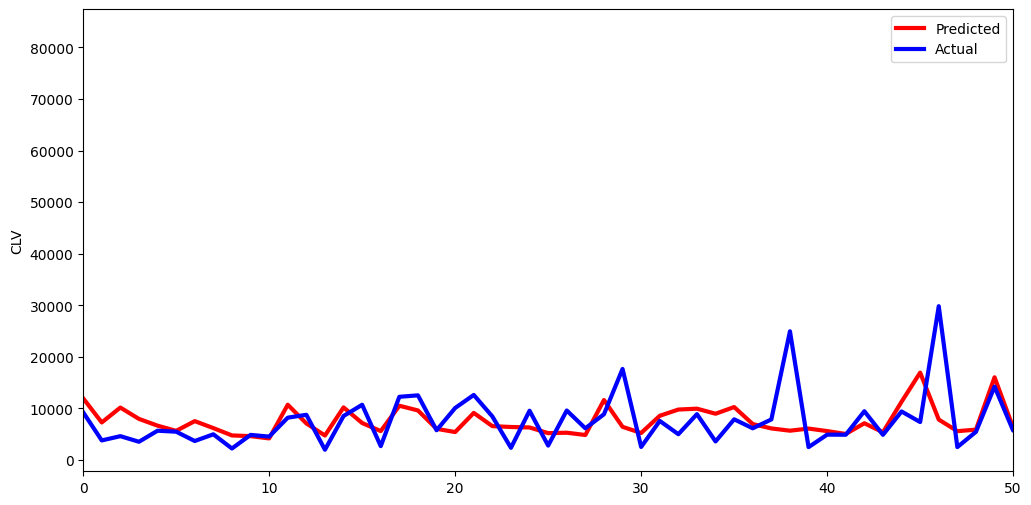

In [ ]:
plt.figure(figsize = [12, 6])

plt.plot(pipeline.predict(X_test), label="Predicted", linewidth=3, color="red")
plt.plot(y_test.values, label="Actual", linewidth=3, color="blue")

plt.xlim([0, 50])
plt.ylabel("CLV")
plt.legend()
plt.show()

Cross-Validation method and plotting learning curve.


Determines cross-validated training and test scores for different training set sizes.

A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. Afterwards, the scores will be averaged over all k runs for each training subset size.

Note that we use the complete data available since cross-validation will automatically split into training and test sets

In [ ]:
model = LinearRegression()

pipeline = Pipeline(steps=[("transformer", transformer), ("model", model)])

train_sizes, train_scores, test_scores = learning_curve(pipeline.fit(X, y), X, y, cv=5)
print("train_size: ", train_sizes)
print("train_scores: ", train_scores)
print("test_scores: ", test_scores)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categ

train_size:  [ 730 2374 4018 5662 7307]
train_scores:  [[0.26387254 0.22594499 0.22594499 0.22594499 0.22594499]
 [0.19922884 0.18147487 0.18406021 0.18406021 0.18406021]
 [0.19923939 0.18798914 0.17931047 0.17643195 0.17643195]
 [0.1849249  0.1791294  0.16964686 0.18069696 0.18359549]
 [0.17488806 0.17021878 0.16311832 0.1700237  0.1765143 ]]
test_scores:  [[0.09002225 0.10590176 0.11043578 0.11409705 0.05764474]
 [0.13168059 0.15893412 0.15493147 0.13271662 0.11201026]
 [0.12704449 0.15681869 0.17097056 0.14425414 0.12368015]
 [0.1310815  0.15234581 0.18339809 0.15438162 0.1282012 ]
 [0.13364819 0.15562873 0.18412786 0.15937954 0.13246777]]


getting mean and std deviation of the train and test scores

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print("train_mean: ", train_mean)
print("train_std: ", train_std)
print("test_mean: ", test_mean)
print("test_std: ", test_std)

train_mean:  [0.2335305  0.18657687 0.18388058 0.17959872 0.17095263]
train_std:  [0.01517102 0.00640474 0.00877067 0.0053816  0.00467328]
test_mean:  [0.09562032 0.13805461 0.14455361 0.14988164 0.15305042]
test_std:  [0.02068854 0.017136   0.01783619 0.01986535 0.01903998]


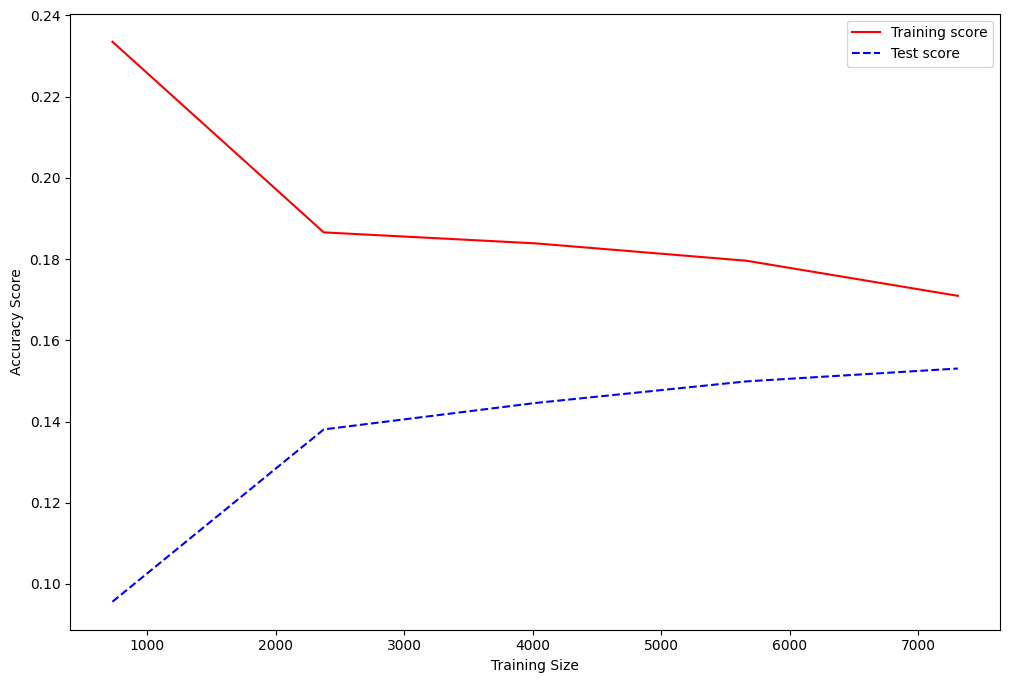

In [ ]:
plt.figure(figsize = [12, 8])

plt.plot(train_sizes, train_mean, color="red", label="Training score")
plt.plot(train_sizes, test_mean, "--", color="blue", label="Test score")

plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

Seems like the training score is decreasing as we increase the training size where as the test score is improving marginally

Here we are selecting the best 10 features(default)

In [ ]:
feature_selection = SelectKBest(score_func=f_regression, k=10)

model = LinearRegression()

pipeline = Pipeline(steps=[("transformer", transformer),
                           ("feature_selection", feature_selection), ("model", model)])

In [ ]:
pipeline.fit(X_train, y_train)
print("Training Score: ", pipeline.score(X_train, y_train))

y_pred = pipeline.predict(X_test)
print("Testing Score: ", r2_score(y_test, y_pred))

Training Score:  0.1733134227682256
Testing Score:  0.15187282712178496


Alternative way of doing the above feature selection.

In [ ]:
feature_selection = GenericUnivariateSelect(f_regression, mode="k_best", param=10)

pipeline = Pipeline(steps=[("transformer", transformer),
                           ("feature_selection", feature_selection),
                           ("model", model)])

pipeline.fit(X_train, y_train)
print("Training Score: ", pipeline.score(X_train, y_train))

y_pred = pipeline.predict(X_test)
print("Testing Score: ", r2_score(y_test, y_pred))

Training Score:  0.16280934399509128
Testing Score:  0.15783644214159853


Here we are creating a loop and incrementing the K by one and checking performance with no. of features(top-k)
Note that using just one feature which is the most statistically important gives us results better than using all features in the regression
Overall the model does not improve as you add features

In [ ]:
mse_scr, mae_scr, r_square_scr = ([] for lst in range (0, 3))

for i in range(1, len(transformed_X_train.columns) + 1, 1):
    feature_selection = SelectKBest(score_func=f_regression, k=i)

    pipeline = Pipeline(steps=[("transformer", transformer),
                               ("feature_selection", feature_selection),
                               ("model", LinearRegression())])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    print("MSE (k={}): {}".format(i, mean_squared_error(y_test, y_pred)))
    mse_scr.append(mean_squared_error(y_test, y_pred))

    print("MAE (k={}): {}".format(i, mean_absolute_error(y_test, y_pred)))
    mae_scr.append(mean_absolute_error(y_test, y_pred))

    print("R-square score (k={}): {}".format(i, r2_score(y_test, y_pred)), end='\n{}\n'.format(50*'-'))
    r_square_scr.append(r2_score(y_test, y_pred))


MSE (k=1): 41358275.77671466
MAE (k=1): 3947.2681161242467
R-square score (k=1): 0.15697804206431798
--------------------------------------------------
MSE (k=2): 41309206.09274182
MAE (k=2): 3944.702984344797
R-square score (k=2): 0.1579782486803143
--------------------------------------------------
MSE (k=3): 41307386.21220822
MAE (k=3): 3944.725326592764
R-square score (k=3): 0.15801534401907869
--------------------------------------------------
MSE (k=4): 41306922.07137171
MAE (k=4): 3941.169733236661
R-square score (k=4): 0.15802480478380831
--------------------------------------------------
MSE (k=5): 41333502.08726108
MAE (k=5): 3943.5337758819037
R-square score (k=5): 0.15748301389392716
--------------------------------------------------
MSE (k=6): 41351554.13680834
MAE (k=6): 3948.2314626693137
R-square score (k=6): 0.15711505188709096
--------------------------------------------------
MSE (k=7): 41375593.416729584
MAE (k=7): 3950.7557057971426
R-square score (k=7): 0.15662504

Scores dataframe is made and Regression metrics are plotted with no. of features(top-k).MAE and MSE values are almost constant and Rsquare is marginally increasing which is still very low.

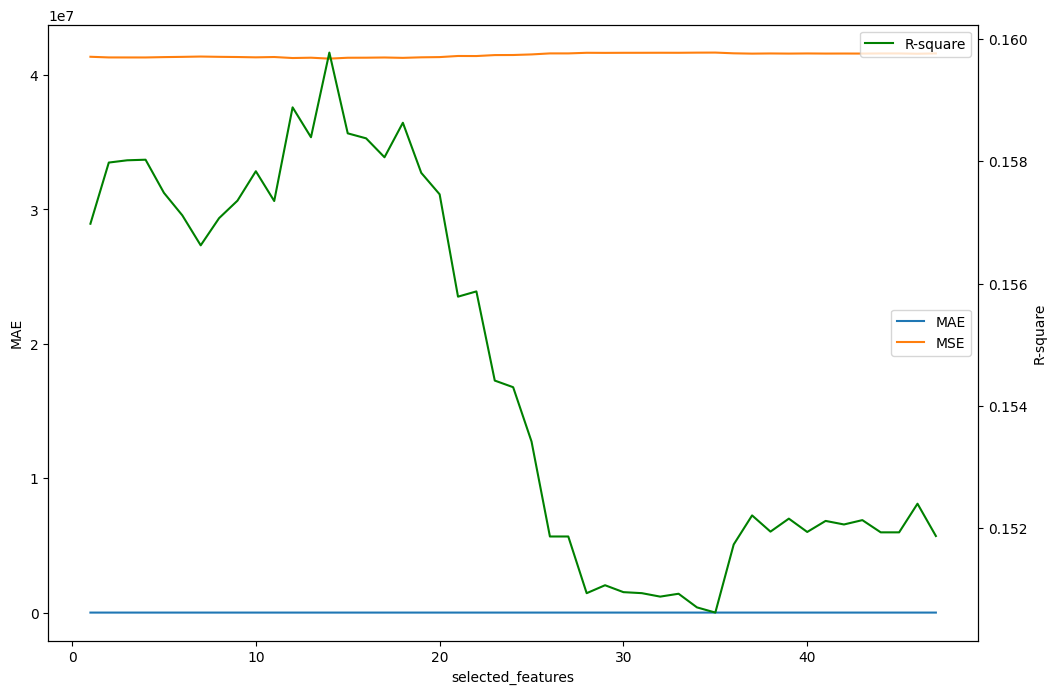

In [ ]:
scores = pd.DataFrame({"selected_features": range(1, len(transformed_X_train.columns) + 1),
                       "MAE": mae_scr,
                       "MSE": mse_scr,
                       "R-square": r_square_scr})


f, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()

sns.lineplot(x='selected_features', y='MAE', label="MAE", data=scores, ax=ax1)
sns.lineplot(x='selected_features', y='MSE', label="MSE", data=scores, ax=ax1)
sns.lineplot(x='selected_features', y="R-square", label="R-square",
             color="green", data=scores, ax=ax2)

plt.show()

As Linear Regression is not giving good performance, We are using Random Forest and checking the Performances with no. of features(top-k)

In [ ]:
se_scr, mae_scr, r_square_scr = ([] for lst in range (0, 3))

for i in range(1, len(transformed_X_train.columns) + 1, 1):
    feature_selection = SelectKBest(score_func=mutual_info_regression, k=i)

    pipeline = Pipeline(steps=[("transformer", transformer),
                               ("feature_selection", feature_selection),
                               ("model", RandomForestRegressor())])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    print("MSE (k={}): {}".format(i, mean_squared_error(y_test, y_pred)))
    mse_scr.append(mean_squared_error(y_test, y_pred))

    print("MAE (k={}): {}".format(i, mean_absolute_error(y_test, y_pred)))
    mae_scr.append(mean_absolute_error(y_test, y_pred))

    print("R-square score (k={}): {}".format(i, r2_score(y_test, y_pred)), end='\n{}\n'.format(50*'-'))
    r_square_scr.append(r2_score(y_test, y_pred))

MSE (k=1): 43966175.68936342
MAE (k=1): 4009.953845785813
R-square score (k=1): 0.1038201951963581
--------------------------------------------------
MSE (k=2): 44623030.75638772
MAE (k=2): 4076.8290215883567
R-square score (k=2): 0.09043126071387741
--------------------------------------------------
MSE (k=3): 40323986.353022024
MAE (k=3): 3855.132743937038
R-square score (k=3): 0.17806036908735223
--------------------------------------------------
MSE (k=4): 14835052.74207271
MAE (k=4): 1451.5517035174564
R-square score (k=4): 0.6976113009106035
--------------------------------------------------
MSE (k=5): 14732958.873836262
MAE (k=5): 1496.9113833807294
R-square score (k=5): 0.6996923202731751
--------------------------------------------------
MSE (k=6): 14331351.325612552
MAE (k=6): 1487.7628484540332
R-square score (k=6): 0.7078784444591335
--------------------------------------------------
MSE (k=7): 14252901.833887884
MAE (k=7): 1482.9472785780067
R-square score (k=7): 0.7094775

At around k=5,Performance peaked(R-square became 0.69 around) for RF model and after that it is stable

Taking k=5, We are checking performance




In [ ]:
feature_selection = SelectKBest(score_func=mutual_info_regression, k=5)
pipeline = Pipeline(steps=[("transformer", transformer),
                           ("feature_selection", feature_selection),
                           ("model", RandomForestRegressor())])

pipeline.fit(X_train, y_train)
print("Training Score: ", pipeline.score(X_train, y_train))

y_pred = pipeline.predict(X_test)
print("Testing Score: ", r2_score(y_test, y_pred))

Training Score:  0.9533217452384681
Testing Score:  0.698846298272692


Selected features are obtained

In [ ]:
mask = pipeline["feature_selection"].get_support()

mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
        True,  True])

In [ ]:
feature_names = transformer.get_feature_names_out()

selected_features = []
for selected, feature in zip(mask, feature_names):
    if selected:
        selected_features.append(feature)

selected_features

['remainder__Income',
 'remainder__Monthly Premium Auto',
 'remainder__Months Since Policy Inception',
 'remainder__Number of Policies',
 'remainder__Total Claim Amount']

In [ ]:
pipeline["feature_selection"].scores_

array([3.12887081e-01, 1.62441309e-01, 0.00000000e+00, 5.92193268e-03,
       0.00000000e+00, 0.00000000e+00, 2.83401463e-01, 1.11878189e-01,
       2.43073550e-02, 8.03131576e-02, 7.73172524e-02, 7.02877781e-02,
       5.95902210e-04, 6.60432164e-02, 4.63502982e-02, 7.76704009e-02,
       7.20495845e-02, 0.00000000e+00, 2.46885702e-03, 1.22808926e-03,
       2.28175528e-03, 0.00000000e+00, 9.15237555e-03, 0.00000000e+00,
       3.71298992e-03, 3.65496022e-04, 0.00000000e+00, 1.01937812e-01,
       2.44602808e-02, 1.26149071e-02, 6.38936220e-02, 4.94641522e-02,
       3.89655429e-02, 2.02235351e-02, 3.03917106e-02, 1.45596314e-01,
       4.77447866e-02, 7.43938907e-02, 6.98782125e-02, 3.81855125e-02,
       8.16749501e-01, 1.63205789e+00, 4.25529386e-01, 5.49294719e-01,
       8.40470107e-02, 8.02012483e-01, 1.00096653e+00])

In [ ]:
pipeline["feature_selection"].scores_[mask]

array([0.8167495 , 1.63205789, 0.54929472, 0.80201248, 1.00096653])

scores of all features among all these features the best 5 are taken

In [ ]:
selected_feature_df = pd.DataFrame({"Feature": selected_features  ,
                                    "Scores": pipeline["feature_selection"].scores_[mask]})

selected_feature_df.sort_values(by="Scores", ascending=False, ignore_index=True)

,Feature,Scores
0,remainder__Monthly Premium Auto,1.632058
1,remainder__Total Claim Amount,1.000967
2,remainder__Income,0.816750
3,remainder__Number of Policies,0.802012
4,remainder__Months Since Policy Inception,0.549295


Recursive Feature Elimination

In [ ]:
model = RandomForestRegressor()

feature_selection = RFE(estimator=model, n_features_to_select=10, step=1)

pipeline = Pipeline(steps=[("transformer", transformer),
                           ("feature_selection", feature_selection),
                           ("model", model)])

In [ ]:
pipeline.fit(X_train, y_train)
print("Training Score: ", pipeline.score(X_train, y_train))

y_pred = pipeline.predict(X_test)
print("Testing Score: ", r2_score(y_test, y_pred))

Training Score:  0.9551773727913897
Testing Score:  0.7142285673516493


In [ ]:
mask = pipeline["feature_selection"].get_support()

mask

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
feature_names = transformer.get_feature_names_out()

selected_features = []
for selected, feature in zip(mask, feature_names):
    if selected:
        selected_features.append(feature)

selected_features

['oe_coverage__Coverage',
 'oe_education__Education',
 'one_hot_enc__Gender_M',
 'remainder__Income',
 'remainder__Monthly Premium Auto',
 'remainder__Months Since Last Claim',
 'remainder__Months Since Policy Inception',
 'remainder__Number of Open Complaints',
 'remainder__Number of Policies',
 'remainder__Total Claim Amount']

In [ ]:
selected_feature_df = pd.DataFrame({"Feature": selected_features  ,
                                    "Scores": pipeline["feature_selection"].ranking_[mask]})

selected_feature_df.sort_values(by="Scores", ascending=False, ignore_index=True)

,Feature,Scores
0,oe_coverage__Coverage,1
1,oe_education__Education,1
2,one_hot_enc__Gender_M,1
3,remainder__Income,1
4,remainder__Monthly Premium Auto,1
5,remainder__Months Since Last Claim,1
6,remainder__Months Since Policy Inception,1
7,remainder__Number of Open Complaints,1
8,remainder__Number of Policies,1
9,remainder__Total Claim Amount,1



SelectFromModel is a meta-transformer that can be used alongside any estimator that assigns importance to each feature through a specific attribute (such as coef_, feature_importances_)

Feature selection is defined and both Training and test data are transformed using Transformer defined earlier.

In [ ]:
feature_selection = SelectFromModel(LassoCV())

X_train_sfm = transformer.fit_transform(X_train)
X_test_sfm = transformer.transform(X_test)

Feature selection is applied.Note that 27 features are selected

In [ ]:
X_train_new = feature_selection.fit_transform(X_train_sfm ,y_train)
X_test_new = feature_selection.transform(X_test_sfm)

X_train_new.shape, X_test_new.shape

((6393, 27), (2741, 27))

Feature selection using one model, actual training can use another model
Model is defined and fit. Predictions are obtained and performance scores are found out

In [ ]:
model = RandomForestRegressor()

model.fit(X_train_new, y_train)
print("Training Score: ", model.score(X_train_new , y_train))

y_pred = model.predict(X_test_new)
print("Testing Score: ", r2_score(y_test, y_pred))

Training Score:  0.9549449109117909
Testing Score:  0.7163755925486506


Now selected features are shown

In [ ]:
mask = feature_selection.get_support()

mask

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
        True,  True,  True, False, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
selected_features = []

for selected, feature in zip(mask,feature_names):
    if selected:
        selected_features.append(feature)

selected_features

['oe_coverage__Coverage',
 'oe_education__Education',
 'one_hot_enc__State_Nevada',
 'one_hot_enc__State_Washington',
 'one_hot_enc__Response_Yes',
 'one_hot_enc__EmploymentStatus_Employed',
 'one_hot_enc__EmploymentStatus_Unemployed',
 'one_hot_enc__Location Code_Suburban',
 'one_hot_enc__Location Code_Urban',
 'one_hot_enc__Marital Status_Single',
 'one_hot_enc__Policy Type_Special Auto',
 'one_hot_enc__Policy_Corporate L2',
 'one_hot_enc__Policy_Corporate L3',
 'one_hot_enc__Policy_Personal L3',
 'one_hot_enc__Renew Offer Type_Offer2',
 'one_hot_enc__Renew Offer Type_Offer3',
 'one_hot_enc__Renew Offer Type_Offer4',
 'one_hot_enc__Vehicle Class_SUV',
 'one_hot_enc__Vehicle Class_Two-Door Car',
 'one_hot_enc__Vehicle Size_Small',
 'remainder__Income',
 'remainder__Monthly Premium Auto',
 'remainder__Months Since Last Claim',
 'remainder__Months Since Policy Inception',
 'remainder__Number of Open Complaints',
 'remainder__Number of Policies',
 'remainder__Total Claim Amount']

In [ ]:
selected_features_df = pd.DataFrame(X_train_new, columns=selected_features)

selected_features_df

,oe_coverage__Coverage,oe_education__Education,one_hot_enc__State_Nevada,one_hot_enc__State_Washington,one_hot_enc__Response_Yes,one_hot_enc__EmploymentStatus_Employed,one_hot_enc__EmploymentStatus_Unemployed,one_hot_enc__Location Code_Suburban,one_hot_enc__Location Code_Urban,one_hot_enc__Marital Status_Single,...,one_hot_enc__Vehicle Class_SUV,one_hot_enc__Vehicle Class_Two-Door Car,one_hot_enc__Vehicle Size_Small,remainder__Income,remainder__Monthly Premium Auto,remainder__Months Since Last Claim,remainder__Months Since Policy Inception,remainder__Number of Open Complaints,remainder__Number of Policies,remainder__Total Claim Amount
0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,-1.242577,-0.594670,-1.397247,-0.610096,-0.421730,0.007895,0.328963
1,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-1.242577,0.685001,-1.496691,-0.110189,-0.421730,-0.409242,1.388585
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.678404,-0.445871,-0.601691,0.532548,-0.421730,-0.826379,0.075367
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,-0.091963,-0.594670,-0.701136,1.496655,-0.421730,-0.826379,0.142911
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-1.242577,-0.029234,-0.203913,-1.110003,-0.421730,-0.826379,0.037155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,-1.242577,-0.505390,1.784976,-0.431558,1.779184,-0.409242,-0.098200
6389,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.242577,-0.862508,-0.999469,-1.074296,0.678727,1.259306,-0.429738
6390,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,-0.350369,-0.832748,-0.601691,0.425425,0.678727,-0.409242,-0.462168
6391,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-0.508051,0.357643,1.387198,-0.074482,-0.421730,-0.409242,-1.418920


Alternatively, We can easily obtain the predictions using Pipeline

In [ ]:
feature_selection = SelectFromModel(LassoCV())
model = RandomForestRegressor()

pipeline = Pipeline(steps=[("transformer", transformer),
                           ("feature_selection", feature_selection),
                           ("model", model)])

pipeline.fit(X_train, y_train)
print("Training Score: ", pipeline.score(X_train, y_train))

y_pred = pipeline.predict(X_test)
print("Testing Score: ", r2_score(y_test, y_pred))

Training Score:  0.9554421247018489
Testing Score:  0.7173953224542233


Other estimators can also be applied( estimators must have feature importance attribute/coefs.

In [ ]:
feature_selection = SelectFromModel(LinearSVR())
model = RandomForestRegressor()

pipeline = Pipeline(steps=[("transformer", transformer),
                           ("feature_selection", feature_selection),
                           ("model", model)])

pipeline.fit(X_train, y_train)
print("Training Score: ", pipeline.score(X_train, y_train))

y_pred = pipeline.predict(X_test)
print("Testing Score: ", r2_score(y_test, y_pred))

Training Score:  0.9515953240568658
Testing Score:  0.7149168255552938
